<h1><center>LSTM. Долгая краткосрочная память</center></h1>

<h1><center>Часть 1. Теория</center></h1>

# 1. RNN

Рассмотрим архитектуру, которая позволяет решать задачи свзанные с последовательностями. Будем изучать по мотивам известной [статьи](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) от [Андрея Карпатова](http://karpathy.github.io/).

<img src='https://drive.google.com/uc?export=view&id=1hYDawc813JLg6vHdvVlbZH-S7ADtwGX6' width=1000>

1) На первой картинке представлен пример нашей обычной нейронной сети. Она что-то получает на вход, что-то с ним делает и выдает выходные значения. Все фиксированных размеров.  
2) Мы познакомимся с архитектурой, которая может на вход получить один вход, а на выходе иметь несколько.   
3) И наоборот, на вход подать несколько (причем неизвестного количества), а на выходе одно значение. Один из примеров такой задачи - это [sentimental analysis](https://monkeylearn.com/sentiment-analysis/). Т.е. на вход идет некое предложение, а на выход мы хотим получить одно значение. Например, оно позитивное или негативное или еще какое.  
4) Или же могут быть варианты многие ко многим. На вход подаем некоторое переменное количество параметров, а на выходе другое тоже переменое количество параметров.  Пример такой задачи - это перевод текста (перевод на другие иностранные языки). Или другой вариант многие ко многим - это когда количество параметров на входе фиксированно и соотвествует выходу.

Собственно, как выглядит архитектура, которая позволяет работать с таким переменным количетсвом параметров на вход и на выход?

## 1.1 Основная Идея
Возьмем обычную нейронную сеть. 

<img src='https://drive.google.com/uc?export=view&id=1ccQJE-E40zNb8U1pfalvxdMXqabepwZp' width=300>

У нас есть вход, выход и т.д. Посередине один линейный слой. И он выдает какой-то сигнал на выходе.  
И мы возьмем и начнем этот же сигнал (этот же вектор) подавать на вход сети самой себе на следующем шаге:


<img src='https://drive.google.com/uc?export=view&id=1zPx_5hIX8_1Q0EPEUWjcOn7hNGHgALWi' width=600>

У нас есть какая-то последовательность данных. Например назовем их a, b, c. Для первого элемента последовательности мы просто прогнали сеть. Чтобы вход скрытого слоя всегда получал одно и тоже значение, мы сначала даем ему просто какой-то нулевой вектор и то что выдал предыдущий слой. А для следующей сети из последовательности мы возьмем то, что выдала сеть на прошлом шаге и передадим ей. Т.е. у такой сети есть возможность передать самой себе в будущем некоторое состояние. Ну и продолжим так делать. 

<img src='https://drive.google.com/uc?export=view&id=1pHueSBIHuRxh1DJTfkQny007g3dh_pCw' width=800>

Мы тренируем такую систему, где промежуточный выход с сети прошлого шага дают на вход сети на следующем шаге. Это значит, что она может выучить некоторое  представление входа. Как-то его закодировать в вектор и передать самой себе на следующем шаге, чтобы знать, что происходило раньше. И таким образом результирующий выход сети, он уже зависит от всей накопленной последовательности. И это дает нам возможность на основе всей последовательности выдать выход.  
И тот факт, что мы даем на вход сети самой себе - это некоторая рекурсия и поэтому такая архитектура называется так, как она называется.

## 1.2 Давайте посмотрим как это примерно выглядит в коде:

In [ ]:
class RNN:
  # ...
  def step(self, x):
    # update the hidden state
    self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    # compute the output vector
    y = np.dot(self.W_hy, self.h)
    return y

Вот наш шаг - т.е. forward, прямой проход. Он выглядит следующим образом:  
Мы делаем матричное произведение весов W и текущего состояния h и добавляем тоже произведение весов W на вход x. и получаем новый h.

Давайте о том же самом, только на другой картинке:

<img src='https://drive.google.com/uc?export=view&id=1cJVaUAJZdjaFw65zR_2QyJ9nEgmMV8td' width=800>

У нас есть набор X, где t - элементы последовательности. Мы сливаем h и X_t  вместе, прогоняем через слой, через тангенсальную функцию активации. и получаем следующие h.

Почему tanh? А например не ReLU? Второй всегда отрезает отрицательную часть сигнала. И это имеет такое последствие, что сигнал, который проходит через сеть никогда не сможет стать отрицательным. И это значит, что когда через много слоев проходим - то сигнал может только расти. Поэтому пользуются именно tanh, что бы были возможности получить и плюс, и минус.

## 1.3 Количество слоев

Можно так же настэкать большое количество слоев, как и везде.   
Вот так выглядит рекурентная сеть с несколькими слоями:

<img src='https://drive.google.com/uc?export=view&id=175Ij-M6mGkW7zo2n-_u9fM-cPezPcTo8' width=800>

То есть обычным образом можно прогнать сигнал через слои сети. И при этом каждый из слоев выдает своему эквивалентному слою в следующей итерации сети некоторое скрытое состояние. Чем больше слоев, тем сеть обладает большей обобщающей способностью. И каждый слой на своем уровне понимания может себе в будущем передать состояние. При этом веса у каждого эквивалентного слоя одни и те же.

## 1.4 Пример

Вот у нас есть задача генерации текста. Разберем наш текст на последовательность символов.  

[BOS], "h", "e", "l", "l", "o"

У нас будет специальный вспомогательный символ BOS - begin of sentense.  

И мы будем тренировать сеть, такую, что по каждому элементу будем предсказывать следующий. Т.е.

[BOS] -> 'h'  
'h' -> 'e'  
'e' -> 'l'  
'l' -> 'l'  
'l' -> 'o'  
'o' -> [EOS]  

Вот пример как это может выглядеть:


<img src='https://drive.google.com/uc?export=view&id=1h6ABYQwTIxCAKdxjgRiIjkf_Go1qvojW' width=800>

Элементы нашей последовательности мы можем представить как one-hot представление. Оно все проходит и на выходе предсказывает следующий символ в one-hot представлении. И если это дело долго тренировать, то на выходе такая сеть начинает генерировать реально хороший текст.

## 1.5 Проблема длинных зависимостей

Но есть небольшой момент. Если вот взять все, что есть и использовать, то оно не будет работать как нам надо.

Почему? Давайте рассмотрим как происходит тренировка такой сети.

<img src='https://drive.google.com/uc?export=view&id=17VtpKmVwlu0a7UjGbNfT0cjljfpsuKqU' width=800>

Вот у нас есть рекуррентная сеть. Она дает себе на вход значение на следующем шаге. Когда мы ее тренируем, мы как бы разматываем всю эту систему в одну большую сеть, которая прогоняет все элементы последовательности. И у всех слоев сетей в разные промежутки времени одни и те же веса. Соответсвенно, проходясь обратным распространением по этим сетям все это вместе складываем и применяем. Так происходит обучение.  

И от этого возникает проблема длинных зависимостей. Т.е. например, то что произошло в начале последовательности, может повлиять на то, что произойдет в конце этой последовательности. Для этого нужно, что бы сигнал во время тренировки протек по длинному пути всей последовательности. А у нас тут очень много матричных умножений на одну и ту же матрицу. Например, у нас 100 таких шагов. Что бы градиент прошел обратно, он будет сто раз умножен на одну и ту же матрицу. И это критично. Т.к. если, например, эта матрица какой-то один сигнал увеличивает чуть. То после того, как оно пройдет 100 раз, сеть этот сигнал сделает огромным. А у нас там tanh, который этот сигнал совсем убьет, т.к. сделает его очень большшим. 

Поэтому в такой простой формулировке, большие последовательности не получается тренировать. И на практике используют другие архитектуры, которые эту проблему решают.

<img src='https://cdn.journaldev.com/wp-content/uploads/2021/03/tanh-graph.png' width=500>

# 2. LSTM. Long Short-Term Memory

[оригинальная статья. 1997](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory)

Автор статьи [Юрген Шмидхубер](https://ru.wikipedia.org/wiki/%D0%A8%D0%BC%D0%B8%D0%B4%D1%85%D1%83%D0%B1%D0%B5%D1%80,_%D0%AE%D1%80%D0%B3%D0%B5%D0%BD). Первая реализации ее случилась только после несколько лет после ее публикации. 

[статья](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), которая объясняет что там происходит

[перевод](https://alexsosn.github.io/ml/2015/11/17/LSTM.html) статьи выше

Вот как можно представить схему LSTM:

<img src='https://drive.google.com/uc?export=view&id=1h2F2sb-DgesuXRtLa4GbxH8QI_4swaE7' width=800>

Выглядит запутанно. Давайте распутывать.  

Основная идея.  

Теперь на каждом шаге мы передаем не один вектор, а два. Один из них (нижний) - это то самый h, который пойдет на вход следующему слою. А кроме этого, мы будем передавать, так называемое self-state. Назовем этот вектор - с. И вот h будет теперь проходить через много нелинейностей, умножаться на матрицы и будет испытывать все те же проблемы, которые мы обсуждали выше.  

А с будет как можно больше напрямую передаваться из прошлого состояния в следующее. Мы по нему будем очень аккуратно делать апдейты, что бы он очень плавно перетекал из одного состояния в другое.  

### 2.1 Как это выглядит подробнее:  

Внутри есть мнгого разных гейтов - некоторый вектор коэффициентов, которые соответсвуют той же размерности что и вход на них.  

#### **Forget gate**

Первый шаг в LSTM - это решить, от какой информации мы хотим избавиться. Это решение принимает слой с сигмоидой, который называется "forget gate layer." (гейт забывания). Он принимает во внимание $h_{t−1}$ и $x_t$, а на выходе даёт значение между 0 и 1 для каждого числа в состоянии ячейки $C_{t−1}$. 1 значит "полностью сохрани это", а 0 - "полностью забудь это".

Пример забывания - языковая модель пытается предсказать следующее слово базируясь на предыдущих. Здесь модель может запоминать род объекта, чтобы использовать правильное образование слов. Когда мы видим новый объект, то нужно забыть род предыдущего объекта. *(Животное не переходило дорогу, потому что оно устало)*

<img src='https://drive.google.com/uc?export=view&id=1oYGrHhH6y4_DtwRcKJDjzvYVChPEMblR'>

#### **Input gate**

Следующий шаг - решить, какую информацию мы должны хранить в состоянии ячейки. Шаг состоит из двух частей. Первая - слой сигмоиды, называемый "input gate layer" (входной гейт), который решает какие значения будут обновляться. Вторая - слой с тангенсом, который создает вектор значений $\tilde{C}_t$, которые будут добавляться к состоянию ячейки. Используем tanh, потому что нам хочется что бы эта добавка могла пойти и в + и в -. 


С примером языковой модели, мы бы хотели добавлять род нового объекта в состояние ячейки, чтобы заменить старый род, который мы забудем. *(Животное не переходило дорогу, потому что оно устало)*

<img src='https://drive.google.com/uc?export=view&id=1kb4hs0Y1cLb55sl-iRPsxMuNzLlu5qXb'>

#### **Update cell state**

Сейчас самое время, чтобы обновить старое состояние $C_{t−1}$ в новое состояние $C_t$. Предыдущие шаги уже решили, что делать, нужно только сделать это.

Умножаем старое состояние на $f_t$, тем самым забывая те вещи, которые хотели забыть, затем прибавляем $i_t∗\tilde{C_t}$. Это новое значение состояния ячейки, которое отмасштабировано в зависимоcти от того, насколько мы хотим обновить новое значение.

В языковой модели, это момент, где мы выкидываем информацию о роде старого объекта и добавляем новую информацию о роде нового объекта. *(Животное не переходило дорогу, потому что оно устало)*


<img src='https://drive.google.com/uc?export=view&id=1oKlTuYYRwdnvfMUQW0FjHRWgtHy0xl1M'>

#### **Output gate**

Наконец-то нам нужно решить, что мы отправим на выход. Выход будет базироваться на состоянии ячейки, но с небольшой фильтрацией. Во-первых, прогоним входной сигнал через сигмоиду, которая решает с какой силой дальше пропускать сигнал, во-вторых, прогоняем состояние ячейки через тангенс и умножаем это на сигмоиду, чтобы пропускать дальше только то, что мы решили пропустить.


Для языковой модели, которая видит только объект, здесь можем пропустить информацию, связанную с глаголом. Например, на выходе может быть полезно число множественной или единственное у объекта, чтобы знать в какую форму нужно поставить глагол. *(Животное не переходило дорогу, потому что оно устало)*

<img src='https://drive.google.com/uc?export=view&id=12SBxiBO-knE250rVlTxSYkmGWLjzFHL0'>

Вот так модуль LSTM выглядит в деталях. Зазубривать все это не обязательно. Основная идея зачем мы все это делаем - это бы мы на следующий шаг передавали два вектора. Один из них h в процессе своего формирования прошел через огромное количество нелинейностей, одних и тех же весов и т.д. и по нему градиент идет ни хорошо, ни плохо.  

Зато у этого С вычисления очень прямолинейные. Т.е. он умножен на какое-то число, которое еще и чаще всего 1, в нему была добавка. А функция + очень хороша для градиента. Вот почему:

Вот наш проход с. Вектор с умножается, складывается и идет дальше:


<img src='https://drive.google.com/uc?export=view&id=1IcyH_3Ab-KenQ8BgHeOrt44CcJ_1Wb_t' width=400>

А вот если все это сложить прошлое со следующим. То видим что мы организовали такой некий highway на котором градиент меньше всего затухает.

<img src='https://drive.google.com/uc?export=view&id=1C-EYALdJNO24YPxBhreZv2PitbQFQ73o' width=800>

Можно провести аналогию с тем, что происходит на сетях ResNet.

Визуализация прохода сигнала по LSTM:

<img src='https://drive.google.com/uc?export=view&id=1ezEAemVgiEW3POhGjEjIjFdre8I7pri-' width=600>

## 2.2 Варианты LSTM

Есть разные вариации LSTM. Например Pinhole Connection:

<img src='https://drive.google.com/uc?export=view&id=1pQh-gincw6lKoOotE-qLgtkvCp2SVLlh' width=800>

Но какого-то большого выигрыша от этого нет и наиболее часто применяются LSTM. 
И GRU:

<img src='https://drive.google.com/uc?export=view&id=10Q_1hrXcOlpe5WgIq-tuGBScDzaxH_Vl' width=600>

# 3. Интересные концепты

## 3.1 Attention

Примеры из статьи [Google's Neural Machine Translation System: Bridging the Gap between Human and Machine Translation](https://arxiv.org/abs/1609.08144).

<img src='https://drive.google.com/uc?export=view&id=1uOHQX8AnPGKY6HEDOTRJzVxCiKAHLoJy' width=450>

Нужно сжать всю информацию о предыдущих словах в один блок, который представляет собой внутренний слой - переходное состояние из кодировщика в декодировщика, что очень сложная задача, которая приводит к недообучению.

И одно из возможных решений - это настакать слои LSTM, один слой LSTM создает вход для другого слоя LSTM:

<img src='https://drive.google.com/uc?export=view&id=1yrBxb5DXZA-LNwNWQdmuF4TNNXqTfNpJ' width=450>

Но эту вещь очень тяжело обучать, если добавлять всё больше LSTM слоем, то снова встречаемся с проблемой затухающих градиентов, плюсом, всё равно нужно сжимать всю информацию в последние блоки - это наш bottleneck (узкое место, горлышко бутылки) между кодировщик и декодировщиком.


И решение этой проблемы - Attention слой. Вместо того, чтобы сжимать всю информацию из всех временных ячеек в одно скрытое состояние, можно дать доступ декодировщику ко всей истории. Но получаем очень слишком много информации, которую нужно учитывать, поэтому мы будем обращать свое внимание только на подвыборку этих ячеек.

Будем учитывать, какая часть предложения на английском языке важна для предсказания слова на французском языке. Подсчет такого распределения достигается получением оценки релевантности каждого слова в предложении для получения нового слова.

<img src='https://drive.google.com/uc?export=view&id=1GAVWyShMSXELaz1f-_e4c9rAeDoJ3QE_' width=450>


**Как использовать эти оценки релевантности?**

Подсчитываются оценки для каждого скрытого состояния и образуют собой взвешанную сумму внимания. А потом эта сумма передается, как еще один вход в декодировщик.

<img src='https://drive.google.com/uc?export=view&id=1a72Ake6Ai2SdkZ9cQpqmq6-ebjblcQ34' width=450>

Можно [провизуализировать](https://distill.pub/2016/augmented-rnns/#attentional-interfaces), какое внимание уделяется каждому слову из предложения:

<img src='https://drive.google.com/uc?export=view&id=1OJ4vgTHPxGMzcR8Ob8An--FFUlnZabQ3' width=500>

А ещё слои внимания можно добавлять и не только к текстам, но и к картинкам.

<img src='https://drive.google.com/uc?export=view&id=1i48NmZMXUneeUwW339tSgvrGU_VvLh9H'>



## 3.2 Bidirectional RNN

Из класса RNN есть еще интересный вариант [Bidirectional RNN](https://maxwell.ict.griffith.edu.au/spl/publications/papers/ieeesp97_schuster.pdf). Они позволяют видеть не только прошлое состояние, но и будущее.


<img src='https://drive.google.com/uc?export=view&id=1kCGsUWhUjIoIAquvE7FjaAbYjAQdsyW7' width=550>


Общая идея: на каждом шаге есть и прямой проход и обратный. И векторы которые несут информацию из прошлого и будущего конкатенируются вместе и идут на выход с сети.

## 3.3 Transformers

### 3.3.1 Общее представление

[The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)


В трансформере находится энкодер и декодер, которые в свою очередь представляют стэк энкодеров и декодеров (в оригинальной статье используется по 6 каждого).   

<img src='https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png' width=500>

Энкодеры все идентичны по структуре, хотя у них разные веса. Каждый можно поделить на два подслоя:

<img src='https://jalammar.github.io/images/t/Transformer_decoder.png' width=500>

Вход энкодера сначала поступает на слой self-attention'a - слой, который позволяет энкодеру смотреть на другие слова во входной последовательности, чтобы более качественно закодировать слово.  
Выходы из self-attention'a скармливаются в сетку с прямым проходом.

У декодера есть такие же два слоя (self-attention и feed forward сетка), но между ними добавляется слой внимания, который фокусируется на релевантных частях входной последовательности.

### 3.3.2 Устройство энкодера

Теперь добавим ещё больше деталей. В самом начале нужно перевести входные слова в эмбеддинги. Каждое слово будет представлять из себя вектор размерности 512.  
Эмбеддинги передаются только в самом первом энкодере, дальше передаются уже выходы из промежуточных энкодеров. Размер таких последовательностей - это гиперпараметр, который можем установить размером самого длинного предложения в обучающей выборке.


<img src='https://jalammar.github.io/images/t/encoder_with_tensors.png' width=500>

Начинает проглядываться ключевая особенность трансформера - слово в последовательности протекает по своему собственному пути в энкодере. Есть зависимости между этими дорожками в слое self-attention'a, а вот в feed-forward слое таких зависимостей нет, поэтому такие вычисления могут совершаться параллельно.

### 3.3.3 Multi-head self-attention

В трансформерах используется не один слой self-attention'a, а несколько, так называемый механизм multi-headed attention. Это улучшает обычный слой внимания двумя путями:
1. Он расширяет возможность модели фокусироваться на разных позициях. Иногда внимание может упасть на само это слово, а на другие не будет обращать внимание. (*Животное не переходило дорогу, потому что оно устало*)

2. Он позволяет слою внимания иметь несколько признаковых описаний. Раз голов внимания больше, то и будет больше наборов с матрицами весов, которые как-то переводят наши слова в векторы для энкодера/декодера. Получаем, что после обучения, каждый такой набор матриц позволит переводить входной эмбеддинг в разные пространства.

<img src='https://jalammar.github.io/images/t/transformer_attention_heads_z.png' width=500>

В примере 8 голов слоя внимания, но feed forward сеть не ожидает столько входов, поэтому нужно сконкатенировать выходы, перемножить на матрицу весов и получить вектор, который является собирательным описанием всех голов внимания. <img src='https://jalammar.github.io/images/t/transformer_attention_heads_weight_matrix_o.png' width=600>

Еще одна деталь в трансформерах:  
они добавляют позиционные векторы ко входным эмбеддингам, эти векторы следуют паттерны, которые изучает модель, чтобы помогать определять позиции каждого слова или дистанции между словами в последовательностях.  
<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png' width=600>

### 3.3.4 Декодер

Выход последнего энкодера трансформируется в набор векторов внимания, они используются в декодере в слое внимания, который помогает декодеру фокусироваться на нужных местах во входных последовательностях.

Такие шаги повторяются, пока не будет получен специальный символ, показывающий, что декодер закончил свой вывод. Выход каждого шага идет в следующий декодер и так же здесь, как и в части с энкодерами, добавляет позиционный векторы в начало декодирования для обозначения позиции каждого слова.

<img src='https://jalammar.github.io/images/t/transformer_decoding_2.gif' width=700>

# <h1><center>Часть 2. Практика</center></h1>



In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
from torch import optim
import time
import math


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

Для реализации LSTM далеко ходить не надо. Все обернуто в объект [LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html):

[лстм от пайторча](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html)

```torch.nn.LSTM(input_dim, hidden_dim, layer_num, batch_first=True)```

In [ ]:
class LSTM_net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layer_num):
        """
        input_dim: кол-во признаков, которые поступают на вход нейронной сети
        hidden_dim: кол-во нейронов на скрытом слое (кол-во признаков
                    на скрытом состоянии реккурентного слоя)
        output_dim: выход нейронной сети
        layer_num: кол-во реккурентных слоев , если layer_num=2, то настакается
                   два слоя LSTM, где второй LSTM будет принимать выходы первого
        """
        super().__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(
            input_dim,
            hidden_dim,
            layer_num,
            batch_first=True
        )
        self.dr = torch.nn.Dropout2d(0.1)
        self.fc = torch.nn.Linear(
            hidden_dim,
            output_dim
        )
        
    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        # print('lstm_out shape', lstm_out.shape)
        # print('lstm_out', lstm_out)
        # print('last hidden state', lstm_out[:, -1])
        out = self.fc(lstm_out[:, -1])
        return out

In [ ]:
net = LSTM_net(input_dim=1, hidden_dim=2, output_dim=3, layer_num=2)
r_input = torch.rand(1, 1, 1)
print('input', r_input)
net(r_input)

input tensor([[[0.4643]]])


tensor([[-0.4603, -0.6033, -0.2541]], grad_fn=<AddmmBackward>)

**Что такое распознавание действий человека и для чего оно нужно?**
<img src='https://drive.google.com/uc?export=view&id=1N2C3WIrsoMBW8VndaIkqgpRt80EgjuOv' width=500>

**Задачи, в которых это нужно**

* Фитнес-приложения
<img src='https://drive.google.com/uc?export=view&id=15xE14DU7gTViFN0qLD8AdnRgbGuVnDCr'>
* Системы видео-наблюдения 
* Системы контроля

<table>
<tr>
<td>
<img src='https://drive.google.com/uc?export=view&id=1y-AssbfQB7_Z3EziUdPF4gpC3y3I1_dg'>
</td>
</tr>
<tr>
<td>
<img src='https://drive.google.com/uc?export=view&id=1AT2PmKWG8Nu-qpCqcwJUo6PDV2TVEFJ7'>
</td>
</tr>
</table>


## Datasets

https://github.com/shahroudy/NTURGB-D

- [NTU RGB+D](http://rose1.ntu.edu.sg/datasets/actionrecognition.asp)
- [Berkeley Multimodal Human Action Database (MHAD)](https://tele-immersion.citris-uc.org/berkeley_mhad) + [Kaggle Dataset](https://www.kaggle.com/dasmehdixtr/berkeley-multimodal-human-action-database)
- [CrowdPose](https://github.com/Jeff-sjtu/CrowdPose)
- [PoseTrack](https://posetrack.net/)

[Sven Kreiss](https://www.svenkreiss.com/), 2019

https://openpifpaf.github.io/predict_api.html

## OpenPifPaf Demo

Предскажем ключевые точки тела на картинке с помощью OpenPifPaf.

In [ ]:
!pip install --upgrade openpifpaf==0.10.1

     |████████████████████████████████| 194kB 7.2MB/s 
     |████████████████████████████████| 174kB 13.0MB/s 
     |████████████████████████████████| 1.4MB 13.8MB/s 
     |████████████████████████████████| 512kB 33.2MB/s 
  Created wheel for openpifpaf: filename=openpifpaf-0.10.1-cp37-cp37m-linux_x86_64.whl size=409219 sha256=3fa1f20d5baf9a7b41612882c568966caf649d245111445be2bcf79c4c6d996a
  Stored in directory: /root/.cache/pip/wheels/d8/92/eb/d5a406ab9c6237c55b61971d10983e34b3f5f803069ad14da3
  Created wheel for pysparkling: filename=pysparkling-0.6.1-cp37-none-any.whl size=187581 sha256=eee63f095122a0ceee3ec55e7b6c3bd2e6bc57d782a9e4034a850902f98bda57
  Stored in directory: /root/.cache/pip/wheels/41/db/df/93a8b5490df3f7d35432d216fcf27fef42e3e3814665754f0f
  Created wheel for python-json-logger: filename=python_json_logger-2.0.1-cp37-none-any.whl size=7387 sha256=8fc162d541180282d39bd2662251e0c88aea9887dd2c19ae4024d38cb710c07e
  Stored in directory: /root/.cache/pip/wheels/59/fe/d0/

In [ ]:
import io
import numpy as np
import openpifpaf
import PIL
import requests
import torch

print(openpifpaf.__version__)
print(torch.__version__)

0.10.1
1.9.0+cu102


Загрузим картинку и отобразим

In [ ]:
image_response = requests.get('https://raw.githubusercontent.com/vita-epfl/openpifpaf/master/docs/coco/000000081988.jpg')
pil_im = PIL.Image.open(io.BytesIO(image_response.content)).convert('RGB')
im = np.asarray(pil_im)

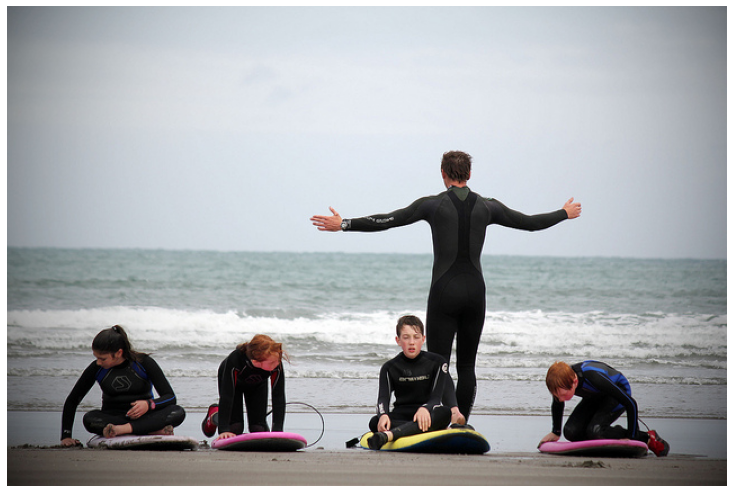

In [ ]:
with openpifpaf.show.image_canvas(im) as ax:
  pass

Загрузим предобученную сеть

In [ ]:
net_cpu, _ = openpifpaf.network.factory(checkpoint='resnet101')

Downloading: "https://github.com/vita-epfl/openpifpaf-torchhub/releases/download/v0.10.0/resnet101block5-pif-paf-paf25-edge401-191012-132602-a2bf7ecd.pkl" to /root/.cache/torch/hub/checkpoints/resnet101block5-pif-paf-paf25-edge401-191012-132602-a2bf7ecd.pkl


/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'openpifpaf.network.nets.Shell' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'openpifpaf.network.basenetworks.BaseNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attri

In [ ]:
net = net_cpu.cuda()
decode = openpifpaf.decoder.factory_decode(net)
processor = openpifpaf.decoder.Processor(net, decode, 
                                         instance_threshold=0.2,
                                         keypoint_threshold=0.3)

Dataset, Dataloader, Визуализации и предсказания

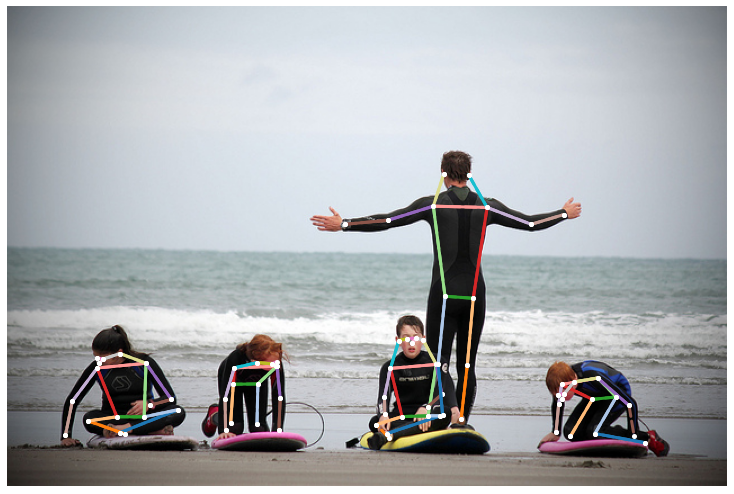

In [ ]:
data = openpifpaf.datasets.PilImageList([pil_im])
data_loader = torch.utils.data.DataLoader(data, batch_size=1)

keypoint_painter = openpifpaf.show.KeypointPainter(color_connections=True,
                                                   linewidth=3)

for images_batch, _, __ in data_loader:
    images_batch = images_batch.cuda()
    fields_batch = processor.fields(images_batch)
    predictions = processor.annotations(fields_batch[0])
    
    with openpifpaf.show.image_canvas(im) as ax:
        keypoint_painter.annotations(ax, predictions)

In [ ]:
len(predictions)

5

In [ ]:
predictions[0].data

array([[ 81.49629   , 317.3141    ,   0.8613094 ],
       [ 85.51066   , 313.39496   ,   0.8507388 ],
       [ 79.80197   , 312.56055   ,   0.6132834 ],
       [100.19723   , 308.5183    ,   0.8860342 ],
       [  0.        ,   0.        ,   0.        ],
       [123.39637   , 317.1933    ,   0.90838724],
       [ 80.006004  , 321.41687   ,   0.84642863],
       [145.93199   , 349.31735   ,   0.8800529 ],
       [ 57.893948  , 350.98236   ,   0.8845918 ],
       [126.714355  , 354.63986   ,   0.8657486 ],
       [ 51.76941   , 381.06912   ,   0.9008231 ],
       [121.71966   , 364.83243   ,   0.8987441 ],
       [ 97.46857   , 364.74393   ,   1.        ],
       [152.09727   , 358.39645   ,   0.8602343 ],
       [ 72.24658   , 368.52206   ,   0.7571929 ],
       [100.03237   , 378.98633   ,   0.8016935 ],
       [105.153656  , 380.23953   ,   0.50939155]], dtype=float32)

## Предсказания действий человека

Classes:
* sitting down
* clapping
* jump up
* cheer up
* hand waving

In [ ]:
!wget 'https://drive.google.com/uc?export=dowload&id=1W7AHF0lMlz-rUDlGCOnUjDTSXLeaGhmC' -O skels.csv

--2021-07-04 18:13:11--  https://drive.google.com/uc?export=dowload&id=1W7AHF0lMlz-rUDlGCOnUjDTSXLeaGhmC
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.100, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/15s9nsmf040pik3jdi3gri9jp0l6uvnn/1625422350000/14904333240138417226/*/1W7AHF0lMlz-rUDlGCOnUjDTSXLeaGhmC?e=dowload [following]
--2021-07-04 18:13:12--  https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/15s9nsmf040pik3jdi3gri9jp0l6uvnn/1625422350000/14904333240138417226/*/1W7AHF0lMlz-rUDlGCOnUjDTSXLeaGhmC?e=dowload
Resolving doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
import pandas as pd
skeletons = pd.read_csv("skels.csv")

In [ ]:
LABELS = {0: "cheer up", 1: "jump up", 2:  "hand waving", 3: "sitting down", 4: "clapping"}

In [ ]:
skeletons.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3336,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346,3347,3348,3349,3350,3351,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,labels
0,-0.526048,-0.277147,2.987706,-0.606184,-0.010056,3.010000,-0.681454,0.251614,3.020046,-0.708330,0.386629,3.087164,-0.704835,0.111742,2.856311,-0.515683,-0.024701,2.727949,-0.353615,-0.123308,2.706112,-0.327895,-0.141611,2.749221,-0.511823,0.157910,3.311851,-0.543163,-0.013495,3.108863,-0.496480,-0.181723,2.912678,-0.424105,-0.341968,2.685757,-0.559787,-0.277896,2.867135,-0.187794,...,-0.570154,-0.290760,2.955790,-0.255583,-0.187767,2.804032,-0.094777,-0.625936,2.721997,0.002962,-0.660430,2.645224,-0.491591,-0.281821,2.985380,-0.109749,-0.353734,2.758277,-0.016498,-0.707223,3.037502,0.080172,-0.741614,2.960732,-0.713666,0.178025,2.969061,-0.599133,0.702776,2.722800,-0.619659,0.647852,2.708625,-0.598600,0.593635,2.707864,-0.601837,0.592191,2.697301,0
1,-0.325320,-0.560200,3.244968,-0.296753,-0.312155,3.234485,-0.267607,-0.066345,3.212031,-0.286594,0.049026,3.222926,-0.412259,-0.156479,3.294798,-0.467307,-0.373163,3.353605,-0.452381,-0.607216,3.276438,-0.459716,-0.668793,3.282482,-0.160399,-0.179870,3.150078,-0.136725,-0.403121,3.128864,-0.160573,-0.601392,3.074458,-0.177965,-0.641335,3.074898,-0.368195,-0.549674,3.236222,-0.341016,...,-0.257144,-0.549525,3.252231,-0.284481,-0.867219,3.254666,-0.260625,-1.214738,3.346629,-0.287114,-1.243873,3.252890,-0.167253,-0.557715,3.216227,-0.177271,-0.884009,3.205395,-0.126542,-1.207360,3.246551,-0.155615,-1.256368,3.249898,-0.198894,-0.136859,3.196666,-0.064467,-0.539597,3.214681,-0.066076,-0.459657,3.206000,-0.227804,-0.654428,3.002556,-0.231687,-0.655208,3.000000,1
2,-0.134503,0.387048,3.797468,-0.135835,0.648782,3.669347,-0.137341,0.904024,3.529603,-0.131990,1.040210,3.459599,-0.305457,0.803356,3.557507,-0.347566,0.584975,3.688359,-0.388565,0.400258,3.742037,-0.379674,0.323533,3.767783,0.034142,0.812697,3.575421,0.083355,0.608419,3.697207,0.079156,0.419270,3.766705,0.059876,0.361420,3.788075,-0.211784,0.380342,3.759820,-0.271761,...,-0.250673,0.606249,3.497178,-0.311035,0.334250,3.712313,-0.343928,0.063761,4.068970,-0.354147,-0.027281,3.967637,-0.095314,0.609818,3.490057,-0.045545,0.354838,3.724567,-0.035290,0.029367,4.036292,-0.048035,-0.061396,3.934838,-0.160851,1.087236,3.319579,-0.358098,0.506673,3.490695,-0.332011,0.576840,3.451273,0.011452,0.521624,3.528420,-0.011325,0.589017,3.480000,1
3,0.371560,-0.187321,2.853457,0.388124,0.118966,2.756247,0.402399,0.418116,2.643035,0.354668,0.559822,2.625852,0.286102,0.348658,2.812573,0.241775,0.077759,2.934890,0.153760,-0.150245,2.875890,0.157503,-0.176863,2.863508,0.485513,0.267053,2.568110,0.518208,0.020373,2.588219,0.423660,-0.210078,2.590119,0.397967,-0.293417,2.620825,0.321781,-0.177898,2.866281,0.343763,...,0.329269,-0.174708,2.878668,0.336804,-0.538840,3.011136,0.415498,-0.883922,3.156997,0.344501,-0.925589,3.085428,0.418745,-0.186306,2.767760,0.473212,-0.551371,2.765115,0.550901,-0.958713,2.980955,0.478178,-0.999143,2.910031,0.389971,0.338643,2.666431,0.089315,0.707141,2.796196,0.106246,0.619960,2.735462,0.352891,-0.375651,2.625237,0.465385,-0.316062,2.651301,2
4,-0.193082,-0.178566,2.814345,-0.196894,0.114788,2.849780,-0.198289,0.400548,2.872416,-0.178771,0.542473,2.863049,-0.360317,0.275860,2.827222,-0.401500,0.038034,2.808956,-0.396649,-0.183429,2.708269,-0.390095,-0.255567,2.687460,-0.017156,0.265163,2.868467,0.011366,0.025235,2.858697,0.022230,-0.202932,2.776967,0.016230,-0.287072,2.753526,-0.258041,-0.174188,2.773036,-0.297204,...,-0.333521,-0.585503,3.089381,-0.355346,-0.564656,2.722364,-0.329321,-0.946284,2.762316,-0.323542,-0.986492,2.630332,-0.160405,-0.595503,3.097269,-0.071415,-0.572318,2.738775,-0.107231,-0.941284,2.766737,-0.103634,-0.981497,2.634580,-0.215003,-0.162058,3.060165,-0.551289,-0.465856,2.999218,

In [ ]:
3375 / (25 * 3)

45.0

In [ ]:
skeletons['labels'].value_counts()

2    132
3    130
0    130
4    128
1    116
Name: labels, dtype: int64

In [ ]:
skeletons.shape

(636, 3376)

### Dataloader

In [ ]:
frames = 45

In [ ]:
class SkeletonDataset(Dataset):
    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        self.labels = self.data.iloc[:,-1]

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = np.asarray(self.data.iloc[idx,:-1]).reshape(frames, 25 * 3)
        label = self.labels[idx]
        
        if self.transform != None:
            item = transform(item)

        return (item, label) 

In [ ]:
dataset = SkeletonDataset(file_path="skels.csv", transform=None)

In [ ]:
skel, lab = dataset.__getitem__(1)
skel, lab = dataset[1]

In [ ]:
LABELS[lab]

'jump up'

In [ ]:
skel.shape

(45, 75)

In [ ]:
skels_for_draw = skel.reshape(-1, 25, 3)

In [ ]:
skels_for_draw[0]

array([[-0.3253195 , -0.5601999 ,  3.244968  ],
       [-0.2967525 , -0.3121555 ,  3.234485  ],
       [-0.2676074 , -0.06634537,  3.212031  ],
       [-0.2865938 ,  0.04902633,  3.222926  ],
       [-0.4122589 , -0.1564787 ,  3.294798  ],
       [-0.4673072 , -0.3731627 ,  3.353605  ],
       [-0.4523812 , -0.6072155 ,  3.276438  ],
       [-0.4597164 , -0.6687925 ,  3.282482  ],
       [-0.1603992 , -0.1798697 ,  3.150078  ],
       [-0.1367252 , -0.4031212 ,  3.128864  ],
       [-0.1605733 , -0.6013921 ,  3.074458  ],
       [-0.1779646 , -0.6413355 ,  3.074898  ],
       [-0.3681951 , -0.5496738 ,  3.236222  ],
       [-0.3410164 , -0.8660461 ,  3.282849  ],
       [-0.3137414 , -1.18629   ,  3.351244  ],
       [-0.3481551 , -1.212369  ,  3.259632  ],
       [-0.2767805 , -0.5604169 ,  3.195294  ],
       [-0.206566  , -0.8699077 ,  3.187913  ],
       [-0.1769435 , -1.191492  ,  3.236771  ],
       [-0.2165914 , -1.25262   ,  3.239565  ],
       [-0.275193  , -0.1275087 ,  3.219

### Немного визуализации данных

In [ ]:
!pip install celluloid

100%|██████████| 20/20 [00:01<00:00, 19.35it/s]


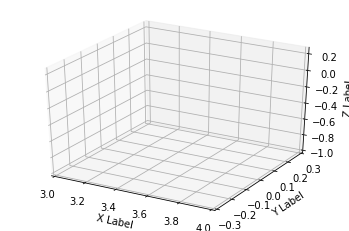

In [ ]:
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D  
import mpl_toolkits.mplot3d as plt3d
import matplotlib.animation as animation
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from matplotlib import pyplot as plt
from celluloid import Camera


bone_pairs = (
    (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
    (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
    (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
    (19, 18), (20, 19), (22, 23), (21, 21), (23, 8), (24, 25), (25, 12)
)

from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

camera = Camera(fig)

for i in tqdm(range(15, 35)):
   
    for_draw = skels_for_draw[i]

    for pair in bone_pairs:
        xs = for_draw[pair[0]-1][0], for_draw[pair[1]-1][0]
        ys = for_draw[pair[0]-1][1], for_draw[pair[1]-1][1]
        zs = for_draw[pair[0]-1][2], for_draw[pair[1]-1][2]

        line = plt3d.art3d.Line3D(zs, xs, ys)
        ax.add_line(line)



    for x,y,z in for_draw:
        ax.scatter(z, x, y, color='black', marker='s')

        ax.set_ylim((-0.3, 0.3))
        ax.set_zlim((-1.0, 0.25))
        ax.set_xlim((3.0, 4.0))


        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
    
    camera.snap()

animation = camera.animate()
animation.save(f'action_{LABELS[lab]}.gif', writer='pillow')

<table>
<tr>
<td><img src='https://drive.google.com/uc?export=view&id=1BYUaqguofbiTqbIQy7ZljyKZB_3HnHwT'>
</td>
<td>
<img src='https://drive.google.com/uc?export=view&id=1U8XS49fTlX7SGw2-rptxwH-biQ5YGW7i'>
</td>
</tr>
</table>

In [ ]:
train_len = int(0.75*len(dataset))

train_dataset, test_dataset = torch.utils.data.random_split(
    dataset,
    [train_len, len(dataset) - train_len]
)
train_loader = DataLoader(
    train_dataset,
    batch_size=16, 
    shuffle=True
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=1, 
    shuffle=False
)

In [ ]:
n_hidden = 128
n_joints = 25 * 3
n_categories = len(LABELS)
n_layer = 2
rnn = LSTM_net(
    n_joints,
    n_hidden,
    n_categories,
    n_layer
)
rnn.to(device)

LSTM_net(
  (lstm): LSTM(75, 128, num_layers=2, batch_first=True)
  (dr): Dropout2d(p=0.1, inplace=False)
  (fc): Linear(in_features=128, out_features=5, bias=True)
)

In [ ]:
def class_from_output(output):
    top_n, top_i = output.topk(1)
    class_i = top_i[0].item()
    return LABELS[class_i], class_i


def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f'{m}m {int(s)}s'

In [ ]:
from torch import optim
import time
import math

criterion = nn.CrossEntropyLoss()
learning_rate = 0.0007
optimizer = optim.SGD(rnn.parameters(), lr=learning_rate, momentum=0.9)

all_losses = []
start = time.time()
counter = 0


for epoch in range(150):  
    current_loss = 0
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
    
        output = rnn(inputs.float())
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step() 

        current_loss += loss.item()
        pred_label = LABELS[int(labels[0])]

        if counter % 500 == 0:
            guess, guess_i = class_from_output(output)
            correct = '✓' if guess == pred_label else f'✗ ({pred_label})'
            print(f'epoch : {epoch} iter : {i} ({time_since(start)})', end=' ')
            print(f'{loss:.4f}  / {guess} {correct}')

        
        counter = counter + 1
        
    if counter % 100 == 0:
        all_losses.append(current_loss / 25)
        current_loss = 0

epoch : 0 iter : 0 (0m 0s) 1.6085  / jump up ✗ (clapping)
epoch : 16 iter : 20 (0m 37s) 1.4227  / sitting down ✓
epoch : 33 iter : 10 (1m 14s) 1.4673  / sitting down ✓
epoch : 50 iter : 0 (1m 51s) 1.2366  / sitting down ✓
epoch : 66 iter : 20 (2m 28s) 0.8521  / clapping ✗ (hand waving)
epoch : 83 iter : 10 (3m 5s) 0.8651  / cheer up ✓
epoch : 100 iter : 0 (3m 42s) 0.7293  / sitting down ✓
epoch : 116 iter : 20 (4m 20s) 1.0181  / clapping ✓
epoch : 133 iter : 10 (4m 56s) 0.5681  / jump up ✓


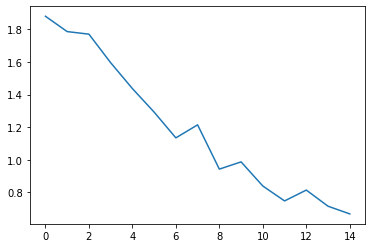

In [ ]:
plt.plot(list(range(0, len(all_losses))), all_losses)
plt.show()

In [ ]:
total = 0
right = 0
counter = 0

rnn.eval()
with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        counter = counter + 1
        inputs, labels = data[0].to(device), data[1].to(device)  
        output = rnn(inputs.float())
        guess, guess_i = class_from_output(output)
        true = LABELS[int(labels[0])]
        
        if guess == true:
            right = right + 1


print('Accuracy of the network:',  (100 * right / counter))

Accuracy of the network:   81.76100628930817


## Домашнее задание

Приложен [ноутбук](https://colab.research.google.com/drive/1WuyxuftSjZpGICdN2nq612y2WOD5L85Z?usp=sharing), в котором реализованы функции для генерации из большого датасета в меньшую его копию. Вам нужно сделать следующее: 
1. Сгенерировать меньший датасет из 8-10 классов движения
2. Обучить уже существующую модель (предварительно проанализировав, какие параметры модели нужно изменить)
3. Изменить модель: посмотреть зависимость от количества LSTM модулей в модели  
4. *Сгенерировать другой датасет с меньшим количеством “кадров” в серии и сравнить улучшилось или ухудшилось качество предсказания. Провести несколько таких итераций, дать свою оценку уменьшению и увеличению кадров, назвать оптимальное, на ваш взгляд, их количество.

## Дополнительные материалы


1. [Статья с которой все началось (2017)](https://arxiv.org/abs/1706.03762)  
2. [Реализация модели из статьи выше на pytorch](https://www.youtube.com/watch?v=U0s0f995w14)  
3. [Короткое видео где все лаконично объясняется](https://www.youtube.com/watch?v=TQQlZhbC5ps)  
4. [Видео по длинее](https://www.youtube.com/watch?v=S27pHKBEp30)    
5. [Статья на русском и на tf](https://www.tensorflow.org/text/tutorials/transformer)   
6. [Статья модели улучшенного трансформера (2018)](https://arxiv.org/abs/1808.03867)  
7. [Статья-вики](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D1%84%D0%BE%D1%80%D0%BC%D0%B5%D1%80_(%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F))  
8. [Библиотека для pytorch](https://huggingface.co/transformers/)  
9. [Пример применения трансформера в качестве классификатора](https://github.com/lucidrains/vit-pytorch)
10. [Прикладное машинное обучение 4. Self-Attention. Transformer overview](https://youtu.be/UETKUIlYE6g)
11. [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)

[Machine Learning Toolkits - Awesome ML Resources](https://www.kaggle.com/arunkumarramanan/machine-learning-toolkits-awesome-ml-resources)

## Определения

**Рекуррентные нейронные сети (Recurrent neural network, RNN)** — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки.

**Долгая краткосрочная память (Long short-term memory, LSTM)** — разновидность архитектуры рекуррентных нейронных сетей, предложенная в 1997 году Зеппом Хохрайтером и Юргеном Шмидхубером. В отличие от традиционных рекуррентных нейронных сетей, LSTM-сеть хорошо приспособлена к обучению на задачах классификации, обработки и прогнозирования временных рядов в случаях, когда важные события разделены временными лагами с неопределённой продолжительностью и границами.

**RNN, LSTM, GRU**
<img src='https://www.mdpi.com/energies/energies-13-00147/article_deploy/html/images/energies-13-00147-g008.png'>
